In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('student_marks.xlsx')

In [3]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


C:\Users\91831\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='iq'>

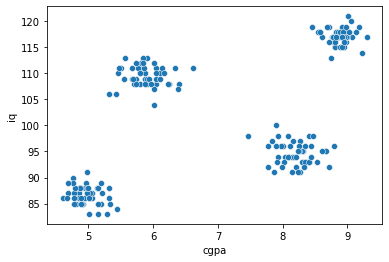

In [4]:
sns.scatterplot(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)

In [6]:
km.fit(df)

KMeans(n_clusters=2)

In [7]:
k_pred = km.predict(df)

In [8]:
k_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0])

In [14]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [9]:
Wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    Wcss.append(km.inertia_)

C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


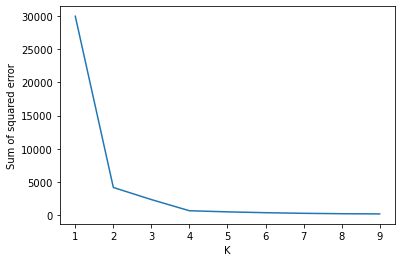

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),Wcss)

In [11]:
km = KMeans(n_clusters=4)

In [12]:
km.fit(df)

KMeans(n_clusters=4)

In [23]:
X = df.iloc[:,:].values
k_pred = km.predict(X)

In [24]:
k_pred

array([3, 2, 1, 1, 2, 2, 1, 0, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 3,
       1, 3, 3, 1, 3, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 3, 2, 3, 1, 1, 3,
       0, 0, 1, 2, 0, 2, 3, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 3, 0,
       1, 3, 2, 1, 2, 0, 1, 3, 2, 0, 2, 0, 3, 1, 1, 0, 2, 3, 0, 3, 0, 2,
       0, 2, 0, 0, 1, 3, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 3, 3, 1, 3, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 2, 0, 3, 3, 2, 1, 0, 1, 3, 1, 2, 3, 1, 1, 2,
       3, 3, 2, 0, 2, 3, 1, 1, 1, 3, 2, 3, 3, 0, 3, 0, 2, 3, 0, 3, 0, 0,
       3, 1, 2, 0, 2, 1, 3, 0, 2, 1, 0, 3, 2, 3, 3, 0, 0, 2, 0, 3, 3, 1,
       0, 2, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 0, 2, 1, 1, 3, 3, 1, 3, 0, 2,
       2, 0])

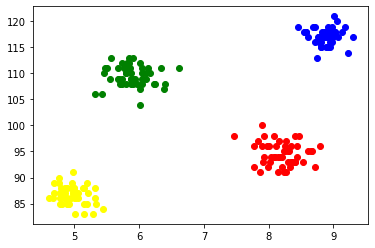

In [26]:
plt.scatter(X[k_pred == 0,0],X[k_pred == 0,1],color='blue')
plt.scatter(X[k_pred == 1,0],X[k_pred == 1,1],color='red')
plt.scatter(X[k_pred == 2,0],X[k_pred == 2,1],color='green')
plt.scatter(X[k_pred == 3,0],X[k_pred == 3,1],color='yellow')